# An introduction to

<img src="img/Julia_Programming_Language_Logo.png" alt="Drawing" style="width: 400px;"/>

# .... with lots of Statistics Examples

> Statistics is partly empirical and partly mathematical. It is now almost **entirely** computational.

> -- Kenneth Lange


Further reading: 
+ [UCLA biostats 257](https://ucla-biostat-257-2021spring.github.io/schedule/schedule.html): statistical computing with Julia 
+ [Why we created Julia?](https://julialang.org/blog/2012/02/why-we-created-julia/) blog post by the authors of Julia
+ [Tim Holy 2021 talk](https://youtu.be/x4oi0IKf52w) "Why Julia?" A high level description of the features and benefits of programming in Julia."

# Types of computer languages

+ **Compiled languages** (low-level languages): C/C++, Fortran, ...
    + Codes are directly compiled to machine code that is executed by CPU
    + Pros: fast, memory efficient
    + Cons: longer development time, hard to debug, hard to profile
+ **Interpreted language** (high-level languages): R, Matlab, Python, SAS IML, JavaScript, ...
    + Codes are interpreted by an interpreter
    + Pros: fast prototyping
    + Cons: excruciatingly slow for loops
+ Mixed (dynamic) languages: Matlab (JIT), R (compiler package), Julia, Cython, JAVA, ...
    + Pros and cons: between the compiled and interpreted languages
+ Script languages: Linux shell scripts, Perl, ...
    + Extremely useful for some data preprocessing and manipulation
+ Database languages: SQL, Hive (Hadoop).
    + Data analysis never happens if we do not know how to retrieve data from databases
    
For statistical computing, each language is perfect for some aspects of the work and terrible for others. Each one is a trade-off.

This creates a famous problem.

# The "Two Language" problem

+ To improve efficiency of interpreted languages such as R or Matlab, conventional wisdom is to avoid "loops" as much as possible. Aka, vectorize code

> The only loop you are allowed to have is that for an iterative algorithm

> -- Hua Zhou

+ When looping is unavoidable, need to code in C, C++, or Fortran. This creates the notorious **two language problem**: 
    
    1. **Prototype code** goes into high-level (easy but slow) languages like R/Python
    2. **Production code** goes into low-level (hard but fast) language like C/C++.


+ Developers program the same thing twice!! Future contributers must *understand and then program in* 2 languages.


+ Success stories:
    + `glmnet` package in R is coded in Fortran
    + `tidyverse` and `data.table` packages use a lot RCpp/C++.

<img src="img/two_language_problem.jpg" alt="Drawing" style="width: 800px;"/>

+ Modern languages such as Julia tries to solve the two language problem. That is to achieve **efficiency without vectorizing code**. 

+ **Take away:** If what you need is common (e.g. matrix algebra, sorting...etc), *someone* has written an efficient low level version which you can use in your language of choice. Most people eventually need something that nobody has written in a fast language: *it is up to you now*.

# Peek at Julia's "for loop" performance

Source: [Julia for R Programmers](https://pages.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf)

+ Example by Douglas Bates (member of R-Core, author of popular R packages `lme4`, `Matrix`, `RcppEigen`, etc)

> As some of you may know, I have had a (rather late) mid-life crisis and run off with another language called Julia.

> -- Doug Bates (on the `knitr` Google Group)

+ The task is to create a Gibbs sampler for the density
$$f(x, y) = kx^2\exp(-xy^2-y^2+2y−4x), \quad x>0$$
 
using the conditional distributions
$$X | Y \sim \Gamma\left(3, \frac{1}{y^2+4}\right)$$
$$Y | X \sim N\left(\frac{1}{1+x}, \frac{1}{2(1+x)}\right)$$

### R solution

The `RCall.jl` package allows us to execute R code without leaving the Julia environment. 

Lets generate 10000 samples with 500 thinning factor. How long does it take?


In [32]:
using RCall
R"""
library(Matrix)

Rgibbs <- function(N, thin) {
  mat <- matrix(0, nrow=N, ncol=2)
  x <- y <- 0
  for (i in 1:N) {
    for (j in 1:thin) {
      x <- rgamma(1, 3, y * y + 4) # 3rd arg is rate
      y <- rnorm(1, 1 / (x + 1), 1 / sqrt(2 * (x + 1)))
    }
    mat[i,] <- c(x, y)
  }
  mat
}

system.time(Rgibbs(10000, 500)) 
"""

RObject{RealSxp}
   user  system elapsed 
 18.800   1.252  20.097 


### Julia version

In [33]:
using Distributions

function jgibbs(N, thin)
    mat = zeros(N, 2)
    x = y = 0.0
    for i in 1:N
        for j in 1:thin
            x = rand(Gamma(3, 1 / (y * y + 4)))
            y = rand(Normal(1 / (x + 1), 1 / sqrt(2(x + 1))))
        end
        mat[i, 1] = x
        mat[i, 2] = y
    end
    mat
end

jgibbs(100, 5); # warm-up aka compile the code
@time jgibbs(10000, 500);

  0.245500 seconds (2 allocations: 156.297 KiB)


Julia is ~70 times faster than R, with essentially the same coding effort.

# Julia package system

+ Each Julia package is a Git repository. Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at https://github.com/JuliaStats/Distributions.jl. 


+ All Julia packages are open source and almost always 100% written in Julia. 


+ To add packages, type `]add Distributions`. Here `]` tells Julia to enter **package manager mode**


```julia
# in Pkg mode
(@v1.6) pkg> add Distributions
```
to remove, type
```julia
(@v1.6) pkg> rm Distributions
```
to update package versions, type
```julia
(@v1.6) pkg> update
```

+ **Package dependencies** are specified in `Project.toml` file (included in all Julia repo), thus all dependent packages will automatically be installed.

    + When combined with `Manifest.toml`, exact computing environments can be reproduced by `]activate .`

    + `Artifacts.toml` will enable Julia to automatically download of binaries/datasets hosted anywhere.

# Some basic Julia code

In [34]:
1 + 1

2

In [35]:
# Float64 is same as double in R
typeof(1.0)

Float64

In [36]:
# function definition and greek letters
function f(x)
    return π*x   # π = \pi<tab>
end
function ∇f(x)
    return π     # ∇ = \nabla<tab>
end
function ∇²f(x)
    return 0     # ∇² = \nabla\^2<tab>
end

θ̂ = f(1) + ∇f(1) + ∇²f(1) # θ̂ = \theta<tab>\hat<tab>

6.283185307179586

In [37]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0
嗨 = 1.0
😽 + 嗨

6.0

View [full list of support unicode characters](https://docs.julialang.org/en/v1/manual/unicode-input/)

## Multi-dimensional arrays

Julia supports efficient multidimensional arrays

In [38]:
# matrices
x = zeros(5, 2)

5×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [39]:
# copy 1st column of x (note: 1-based indexing)
x[:, 1]

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [40]:
# "view" 1st column of x without allocating memory
z = @view(x[:, 1])
z[1] = 13
x

5×2 Matrix{Float64}:
 13.0  0.0
  0.0  0.0
  0.0  0.0
  0.0  0.0
  0.0  0.0

## Linear algebra


> Over the past 30 years I have worked with many different linear algebra packages in Fortran, C, C++, and Python. I even had a hand in designing and writing the Matrix package for R. None of them come close to the coverage, flexibility, and efficiency of the LinearAlgebra standard library for Julia.

> --Doug Bates on Julia Discourse

In [41]:
using LinearAlgebra
x = randn(10) # x[i] ~ N(0, 1)
y = rand(10)  # y[i] ~ Uniform(0, 1)

# multiple "intuitive" ways to compute dot products
dot(x, y), Transpose(x)*y, x'y

(0.2294342627077997, 0.2294342627077997, 0.2294342627077997)

Transposing matrix is an expensive memory operation. In R, the command
```R
t(A) %*% x
```
will first transpose A then perform matrix multiplication, causing unnecessary memory allocation. Julia is smart to avoid transposing matrix if possible.

In [42]:
# same data in tranpose(x) and original matrix A
A = rand(10, 10)
pointer(Transpose(A).parent), pointer(A)

(Ptr{Float64} @0x00000001076e4740, Ptr{Float64} @0x00000001076e4740)

## BLAS - Basic Linear Algebra Subroutine

BLAS are *very efficient* libraries for computing

+ Dot products (BLAS 1)
+ Matrix-Vector multiplication (BLAS 2)
+ Matrix-matrix multiplication (BLAS 3)

OpenBLAS is automatically shipped within Julia and are used whenever possible. 

In [43]:
# matrix multiplication calls BLAS internally
x, y = randn(5, 5), randn(5, 5)
x * y

5×5 Matrix{Float64}:
 -1.65467    0.0817453  -0.342741  -1.2351     1.59056
  0.683025   8.71869    -0.550223  -0.453495  -1.44121
 -0.194894   1.99144    -0.20761    0.599753   1.45288
 -1.22923    2.13921     0.896925   0.599878  -2.39992
 -2.94833   -1.93842     0.300229   1.60076    3.60858

In [44]:
# in-place matrix multiplication
z = zeros(5, 5)
mul!(z, x, y)
z

5×5 Matrix{Float64}:
 -1.65467    0.0817453  -0.342741  -1.2351     1.59056
  0.683025   8.71869    -0.550223  -0.453495  -1.44121
 -0.194894   1.99144    -0.20761    0.599753   1.45288
 -1.22923    2.13921     0.896925   0.599878  -2.39992
 -2.94833   -1.93842     0.300229   1.60076    3.60858

## LAPACK (Linear Algebra Package)

LAPACK routines are automatically available as well

In [45]:
# QR factorization
qr(x)

LinearAlgebra.QRCompactWY{Float64, Matrix{Float64}}
Q factor:
5×5 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}}:
 -0.211177   0.464872   -0.0203552  -0.494496    0.703106
 -0.640069  -0.614752    0.42064    -0.0786246   0.171091
  0.224125  -0.552035   -0.642528    0.0859209   0.474131
 -0.297105  -0.0824806  -0.488945   -0.643666   -0.501549
  0.638132  -0.307293    0.413204   -0.572366    0.00425096
R factor:
5×5 Matrix{Float64}:
 -1.63146  2.31755  -0.142046   1.10349   -1.00645
  0.0      2.45563  -1.19657    0.725667   0.564366
  0.0      0.0       0.186884  -0.16862   -0.803436
  0.0      0.0       0.0       -2.23837    0.531749
  0.0      0.0       0.0        0.0       -1.9513

In [46]:
# least squares
A = rand(5, 5)
b = rand(5)
x = A \ b

5-element Vector{Float64}:
 -0.9322599319812565
  0.4769418951918883
  0.8868257619396387
  0.3735977385411867
  0.3831933336704221

**Tip for R user**. Standard R distribution from CRAN uses a very out-dated BLAS/LAPACK library. Re-build R from source using OpenBLAS or MKL will immediately boost linear algebra performance in R. Google `build R using MKL` to get started. Similarly we can build Julia using MKL.

## Help

What is `\` doing? Type `?\` to pull up the documentation

In [47]:
?\

search: \



```
\(x, y)
```

Left division operator: multiplication of `y` by the inverse of `x` on the left. Gives floating-point results for integer arguments.

# Examples

```jldoctest
julia> 3 \ 6
2.0

julia> inv(3) * 6
2.0

julia> A = [4 3; 2 1]; x = [5, 6];

julia> A \ x
2-element Vector{Float64}:
  6.5
 -7.0

julia> inv(A) * x
2-element Vector{Float64}:
  6.5
 -7.0
```

---

```
\(A, B)
```

Matrix division using a polyalgorithm. For input matrices `A` and `B`, the result `X` is such that `A*X == B` when `A` is square. The solver that is used depends upon the structure of `A`.  If `A` is upper or lower triangular (or diagonal), no factorization of `A` is required and the system is solved with either forward or backward substitution. For non-triangular square matrices, an LU factorization is used.

For rectangular `A` the result is the minimum-norm least squares solution computed by a pivoted QR factorization of `A` and a rank estimate of `A` based on the R factor.

When `A` is sparse, a similar polyalgorithm is used. For indefinite matrices, the `LDLt` factorization does not use pivoting during the numerical factorization and therefore the procedure can fail even for invertible matrices.

See also: [`factorize`](@ref), [`pinv`](@ref).

# Examples

```jldoctest
julia> A = [1 0; 1 -2]; B = [32; -4];

julia> X = A \ B
2-element Vector{Float64}:
 32.0
 18.0

julia> A * X == B
true
```

---

```
(\)(F::QRSparse, B::StridedVecOrMat)
```

Solve the least squares problem $\min\|Ax - b\|^2$ or the linear system of equations $Ax=b$ when `F` is the sparse QR factorization of $A$. A basic solution is returned when the problem is underdetermined.

# Examples

```jldoctest
julia> A = sparse([1,2,4], [1,1,1], [1.0,1.0,1.0], 4, 2)
4×2 SparseMatrixCSC{Float64, Int64} with 3 stored entries:
 1.0   ⋅
 1.0   ⋅
  ⋅    ⋅
 1.0   ⋅

julia> qr(A)\fill(1.0, 4)
2-element Vector{Float64}:
 1.0
 0.0
```


In [48]:
# use @which to see source code of \
@which A \ b

\(A::AbstractMatrix, B::AbstractVecOrMat) in LinearAlgebra at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/generic.jl:1128

In [18]:
# determinant, trace, rank, ...etc
x = rand(5, 5)
det(x), tr(x), rank(x)

(-0.0009135994480359265, 2.0733614611315265, 5)

# Julia for statistical genetics

+ JuliaStats (https://github.com/JuliaStats): 40 repositories for general statistic packages
+ OpenMendel (https://github.com/OpenMendel): 36 repositories for genetic analysis, most notably the "gateway packages"
    + SnpArrays.jl: https://github.com/OpenMendel/SnpArrays.jl
    + VCFTools.jl: https://github.com/OpenMendel/VCFTools.jl
    + BGEN.jl: https://github.com/OpenMendel/BGEN.jl
    + PGEN.jl: https://github.com/OpenMendel/PGEN.jl
    
These packages are similar to PLINK and VCFTools...etc, the only difference is they exist in the **high-level** programming environment, which allows for plotting and custom-defined operations

## SnpArrays.jl instead of PLINK

SnpArrays.jl (https://github.com/OpenMendel/SnpArrays.jl) contain Julia utilities to read, summarize, filter, merge, and perform compressed linear algebra on binary PLINK (.bed/.bim/.fam) files

In [49]:
# example data
using SnpArrays, Plots
datapath = normpath(SnpArrays.datadir())

"/Users/biona001/.julia/dev/SnpArrays/data"

The ; will bring up bash-shell within Julia REPL or jupyter notebook.

In [50]:
;ls /Users/biona001/.julia/dev/SnpArrays/data

EUR_subset.bed
EUR_subset.bim
EUR_subset.fam
mouse
mouse.bed
mouse.bim
mouse.fam


In [51]:
# read PLINK file
xdata = SnpData("/Users/biona001/.julia/dev/SnpArrays/data/mouse")

SnpData(people: 1940, snps: 10150,
snp_info: 
 Row │ chromosome  snpid       genetic_distance  position  allele1  allele2
     │ String      String      Float64           Int64     String   String
─────┼──────────────────────────────────────────────────────────────────────
   1 │ 1           rs3683945           0.0              0  A        G
   2 │ 1           rs3707673           0.1              1  G        A
   3 │ 1           rs6269442           0.11751          2  A        G
   4 │ 1           rs6336442           0.135771         3  A        G
   5 │ 1           rs13475700          0.24268          5  A        C
   6 │ 1           rs3658242           0.251925         6  A        T
…,
person_info: 
 Row │ fid        iid         father        mother        sex        phenotype
     │ Abstract…  Abstract…   Abstract…     Abstract…     Abstract…  Abstract…
─────┼─────────────────────────────────────────────────────────────────────────
   1 │ 1_3        A048005080  H2.3:C5.2(3)  H2.3:G2

In [52]:
# compressed genotypes (2 bit per entry)
x = xdata.snparray

1940×10150 SnpArray:
 0x02  0x02  0x02  0x02  0x03  0x02  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x02  0x02  0x03  0x02  0x02  0x02     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x02  0x02  0x02  0x02  0x02  0x02     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x03  0x03     0x02  0x02  0x02  0x02  0x02  0x02
 0x02  0x02  0x02  0x02  0x03  0x02  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x02  0x02  0x02  0x02  0x03  0x02     0x03  0x03  0x03  0x03  0x03  0x03
 0x02  0x02  0x03  0x02  0x02  0x02     0x03  0x03  0x03  0x03  0x03  0x03
 0x02  0x02  0x03  0x02  0x02  0x02     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x03  0x03     0x02  0x02  0x02  0x02  0x02  0x02
 0x03  0x03  0x03  0x03  0x03  0x03  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x02  0x02  0x02  0x02  0x03  0x02     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x03  0x03     0x00  0x00  0x00  0x00  0x00  0x00
    

### Translating genotypes to numbers

| Genotype | `SnpArray` | `model=ADDITIVE_MODEL` | `model=DOMINANT_MODEL` | `model=RECESSIVE_MODEL` |    
|:---:|:---:|:---:|:---:|:---:|  
| A1,A1 | 0x00 | 0 | 0 | 0 |  
| missing | 0x01 | NaN | NaN | NaN |
| A1,A2 | 0x02 | 1 | 1 | 0 |  
| A2,A2 | 0x03 | 2 | 1 | 1 |  

`convert` and `copyto!` are main functions that will perform this conversion

In [53]:
# convert genotypes to numeric matrix
xfloat = convert(Matrix{Float64}, x, model=ADDITIVE_MODEL,
    center=false, scale=false, impute=false)

1940×10150 Matrix{Float64}:
 1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  …    2.0    2.0    2.0    2.0    2.0
 1.0  1.0  2.0  1.0  1.0  1.0  1.0  2.0       2.0    2.0    2.0    2.0    2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0       2.0    2.0    2.0    2.0    2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0       2.0    2.0    2.0    2.0    2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0       1.0    1.0    1.0    1.0    1.0
 1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  …    2.0    2.0    2.0    2.0    2.0
 1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0       2.0    2.0    2.0    2.0    2.0
 1.0  1.0  2.0  1.0  1.0  1.0  1.0  2.0       2.0    2.0    2.0    2.0    2.0
 1.0  1.0  2.0  1.0  1.0  1.0  1.0  2.0       2.0    2.0    2.0    2.0    2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0       1.0    1.0    1.0    1.0    1.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  …    0.0    0.0    0.0    0.0    0.0
 1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0       2.0    2.0    2.0    2.0    2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  

In [24]:
# to save memory, use `copyto!` to convert SNP by SNP
n, p = size(xdata)
storage = zeros(n)
for i in 1:p
    copyto!(storage, @view(x[:, i]), center=true, scale=true, impute=true)
    # do something with `storage`
end

### Minor allele frequency

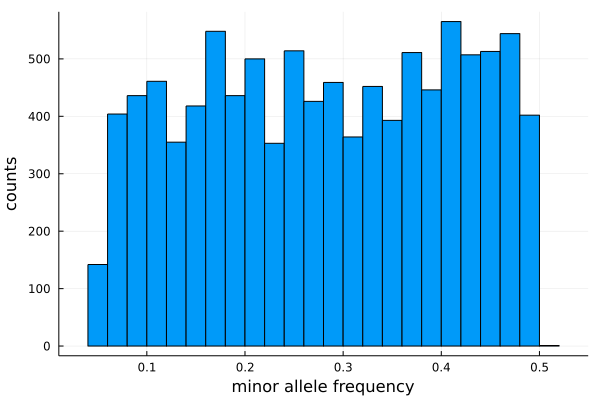

In [54]:
mafs = maf(x)
histogram(mafs, xlabel="minor allele frequency", ylabel="counts", legend=false)

### Not covered

+ Split, concatenate, filter, merge, reordering, summarize, ...etc
+ Genetic relationship matrix
+ Linear Algebra on PLINK without converting to numeric matrix
+ Linear Algebra on PLINK directly on GPU

# Tips to writing performant code

General tips:

+ Inner for loops should access array elements in "memory order", aka write **cache aware** code. For example, assuming cache lines are column oriented (as in Julia, Fortran, Matlab, R,...etc). Which function below is faster for summing matrix entries? 

In [62]:
function matrix_sum(x) # sum along rows first
    n, p = size(x)
    s = 0.0
    for i in 1:n
        for j in 1:p
            s += x[i, j]
        end
    end
    return s
end

function matrix_sum2(x) # sum along columns first
    n, p = size(x)
    s = 0.0
    for j in 1:p
        for i in 1:n
            s += x[i, j]
        end
    end
    return s
end

x = rand(10000, 10000)
matrix_sum(x) ≈ matrix_sum2(x) ≈ sum(x)

true

In [63]:
using BenchmarkTools
@benchmark matrix_sum(x)

BenchmarkTools.Trial: 6 samples with 1 evaluation.
 Range (min … max):  855.467 ms … 895.854 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     872.643 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   873.113 ms ±  15.216 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █      █       █                    █  █                    █  
  █▁▁▁▁▁▁█▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  855 ms           Histogram: frequency by time          896 ms <

 Memory estimate: 16 bytes, allocs estimate: 1.

In [64]:
@benchmark matrix_sum2(x)

BenchmarkTools.Trial: 95 samples with 1 evaluation.
 Range (min … max):  47.381 ms … 55.191 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     53.381 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   53.058 ms ±  1.355 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

                                        ▆▅ ▂     ▃▃ █ ▂ ▂      
  ▄▁▁▁▁▁▁▄▁▄▁▁▁▁▁▁▄▁▄▁▁▁▁▁▁▄▁▁▁▄▁▁▄▁▄▁▄▁██▅█▅█▇█▅████▇█▅█▄▇▄▅ ▁
  47.4 ms         Histogram: frequency by time        54.9 ms <

 Memory estimate: 16 bytes, allocs estimate: 1.

+ Monitor time and memory allocations using `@time f(x)` and `@benchmark f(x)` from [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl). As a rule of thumb, computationally intensive routines should have **0** memory allocations
+ Use efficient libraries like BLAS/LAPACK as much as possible 
    + **note:** even this is becoming "obsolete" thinking with packages like [LoopVectorization.jl](https://github.com/JuliaSIMD/LoopVectorization.jl) and [Tullio.jl](https://github.com/mcabbott/Tullio.jl) (see last example below)
+ Annotate `for` loops with @inbounds, @simd, @fastmath...etc
+ Check for type stability via `@code_warntype`

Advanced tips:
1. Find bottlenecks by **rigorously profiling** your code
    + [How long it takes your code to run line-by-line](https://docs.julialang.org/en/v1/manual/profile/#Profiling)
    + [How much memory your code allocates line-by-line](https://docs.julialang.org/en/v1/manual/profile/#Memory-allocation-analysis)
2. Develop a [mental model](https://biojulia.net/post/hardware/) for how computers work
3. Learn different levels of [parallel programming](https://docs.julialang.org/en/v1/manual/parallel-computing/): SIMD, multithreading, distributed computing, GPUs
4. `@code_lowered`, `@code_llvm`, `@code_native`,...etc

# Interested in Julia?

I'm developing a Julia package for generating Knockoffs - [Knockoffs.jl](https://github.com/biona001/Knockoffs.jl)

Existing/work-in-progress features: 

+ Fixed-X knockoffs (SDP and equi correlated)
+ Model-X knockoffs (SDP and equi correlated)
+ (single SNP) fastPHASE HMM knockoffs 
+ SHAPEIT HMM knockoffs (wrapper code only)
+ KnockoffScreen knockoffs
+ Support for PLINK binary files

Desired features:
+ MRC minimizing knockoffs ([ref](https://arxiv.org/abs/2011.14625))
+ Linear-time model-X knockoffs ([ref](https://epubs.siam.org/doi/abs/10.1137/20M1363698))
+ (Parallelized) ASDP knockoffs
+ Support for VCF, BGEN, PGEN file formats (which are all commonly used genetic data formats)
+ (Grouped) fastPHASE HMM knockoffs
+ Packages RaPID.jl and SNPKNOCK2.jl to better wrap SHAPEIT HMM knockoffs

There are also a list of [existing issues](https://github.com/biona001/Knockoffs.jl/issues), e.g.
+ SDP solver slower than Matlab/R equivalent
+ HMM normalizing constant sometimes overflows

# Short history of Julia

+ 2012: Julia first appearance along with [famous blog post](https://julialang.org/blog/2012/02/why-we-created-julia/)
+ 2013-2015 (around): Kenneth Lange hears about Julia, begins converting Mendel (75k+ lines of closed-source Fortran code) to [OpenMendel](https://github.com/OpenMendel) (pure Julia)
+ 2017: Julia becomes [the 4th language to break 1 peta-flop barrier](https://www.youtube.com/watch?v=uecdcADM3hY) using 9000+ machines, 650k cores, and 1.3 million threads  (the other 3 are C, C++, Fortran) 
+ 2018: Julia v1.0 is released, enters "top 50 programming languages"
+ 2020-2021: 
    + Usually 20-30th place in top 50 programming languages
    + +87% more downloads
    + 1000+ contributors to Julia language itself, 3-8 new packages and 50-60 new package versions per day
    + World wide usage estimated ~50% of Matlab

# Extra time (motivating example 2): matrix-matrix multiplication

<img src="img/bench_AmulB_v2.svg" alt="Drawing" style="width: 900px;"/>

In [29]:
using LoopVectorization, BenchmarkTools
function mygemmavx!(C, A, B)
   @turbo for m ∈ axes(A,1), n ∈ axes(B,2)
       Cmn = zero(eltype(C))
       for k ∈ axes(A,2)
           Cmn += A[m,k] * B[k,n]
       end
       C[m,n] = Cmn
   end
end
M, K, N = 191, 189, 171
C = Matrix{Float64}(undef, M, N)
A = randn(M, K)
B = randn(K, N);

In [30]:
@benchmark mygemmavx!($C, $A, $B)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  276.981 μs … 927.553 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     328.379 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   344.160 μs ±  69.237 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

     █▅▁   ▄                                                     
  ▁▃████▅▄▆█▆▃▃▄▃▆▃▄▂▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  277 μs           Histogram: frequency by time          654 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [31]:
BLAS.set_num_threads(1)
@show BLAS.vendor()
@benchmark mul!($C, $A, $B)

BLAS.vendor() = :openblas64


┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = top-level scope at show.jl:1047
└ @ Core show.jl:1047


BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  265.348 μs … 713.928 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     282.417 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   292.151 μs ±  27.277 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

    ▄▃▁▇█▆▅▅▂▁▆▄▅▂▃        ▁▁                                   ▂
  █▂████████████████▇▇▆▄▆▆█████▇▇████▇▇▆▆█▆▇▆▇▆▆▆▅▅▆▄▆▅▅▅▄▅▆▅▅▆ █
  265 μs        Histogram: log(frequency) by time        414 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.